# Scraping Data of Countries of the World From "scrape this site" :
### URL : https://www.scrapethissite.com/pages/simple/

In [1]:
import requests, re
from bs4 import BeautifulSoup
import pandas as pd
# from IPython.display import display, HTML

In [12]:
url = "https://www.scrapethissite.com/pages/simple/"

response = requests.get(url)

# Parsing the webpage content
soup = BeautifulSoup(response.content, 'html.parser')

all_countries = soup.find_all('div', {'class': 'col-md-4 country'})

countries_content = []
id_ = 1

for countrie in all_countries :
    countries_content.append({
        'Id': id_, 
        'Name': countrie.find('h3').text.strip(), 
        'Capital': countrie.find('span', {'class': 'country-capital'}).text.strip(), 
        'Population': int(countrie.find('span', {'class': 'country-population'}).text.strip()), 
        'Area (km2)': float(countrie.find('span', {'class': 'country-area'}).text.strip()),
    })
    id_ += 1

In [13]:
df = pd.DataFrame(countries_content)
df.head(10)

,Id,Name,Capital,Population,Area (km2)
0,1,Andorra,Andorra la Vella,84000,468.0
1,2,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,3,Afghanistan,Kabul,29121286,647500.0
3,4,Antigua and Barbuda,St. John's,86754,443.0
4,5,Anguilla,The Valley,13254,102.0
5,6,Albania,Tirana,2986952,28748.0
6,7,Armenia,Yerevan,2968000,29800.0
7,8,Angola,Luanda,13068161,1246700.0
8,9,Antarctica,None,0,14000000.0
9,10,Argentina,Buenos Aires,41343201,2766890.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          250 non-null    int64  
 1   Name        250 non-null    object 
 2   Capital     250 non-null    object 
 3   Population  250 non-null    int64  
 4   Area (km2)  250 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.9+ KB


### storing the scraped data in a CSV file

In [15]:
df.to_csv(path_or_buf="Countries_of_the_World.csv")

## Data Visualization :

In [17]:
# import matplotlib.pyplot as plt
import plotly.express as px

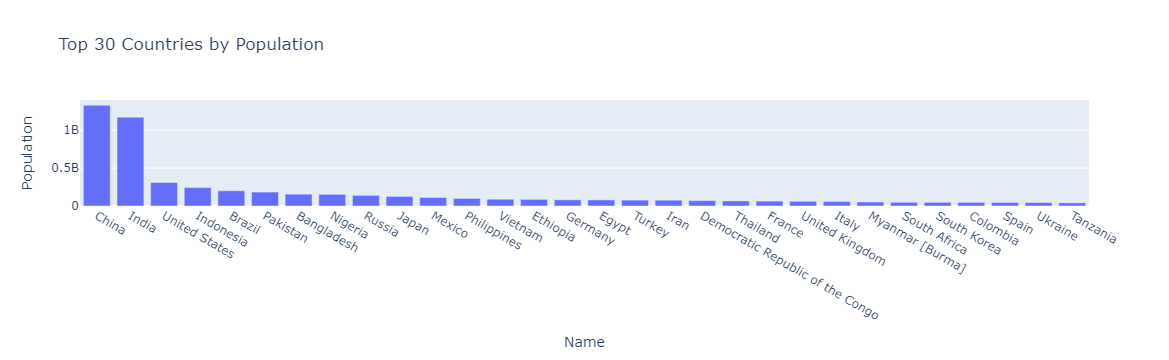

In [19]:
# Sort the DataFrame by Population in descending order and select the top 30
top_30_countries = df.sort_values(by='Population', ascending=False).head(30)

fig = px.bar(top_30_countries, x='Name', y='Population', title='Top 30 Countries by Population')
fig.show()

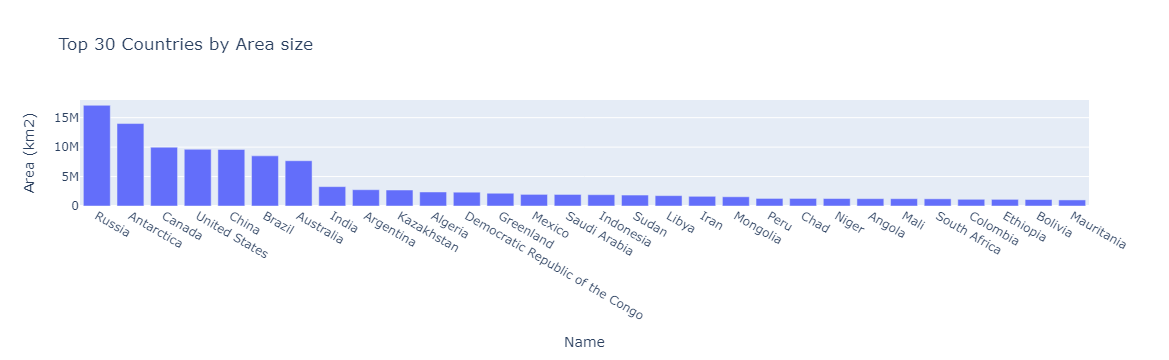

In [20]:
# Sort the DataFrame by Area size in descending order and select the top 30
top_30_countries2 = df.sort_values(by='Area (km2)', ascending=False).head(30)

fig2 = px.bar(top_30_countries2, x='Name', y='Area (km2)', title='Top 30 Countries by Area size')
fig2.show()